# Analyzing Housing Prices in Canada 

This project is an exploratory analysis on housing prices in Canada based off the dataset Canadian house prices for top cities [JEREMY LARCHER, KAGGLE]. The dataset presents housing information for the top 45 populous Canadian cities, detailing property prices, addresses, bedrooms, bathrooms, city, province, population, coordinates, and median family income. It enables analysis on housing prices relative to city demographics, property features, and geographical locations, offering insights into regional housing trends and affordability across Canada.It is important to note the dates for housing prices in Canada are from October 2023, and median family income is from 2021. 

## Downloading the Dataset

First, the dataset is loaded from kaggle.

In [4]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [5]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/jeremylarcher/canadian-house-prices-for-top-cities' 

In [6]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mkhan14
Your Kaggle Key: ········


100%|██████████| 448k/448k [00:01<00:00, 383kB/s]

The dataset has been downloaded and extracted.

In [23]:
# Change this
data_dir = './canadian-house-prices-for-top-cities' 

In [24]:
import os
os.listdir(data_dir)

['HouseListings-Top45Cities-10292023-kaggle.csv']

Let us save and upload our work to Jovian before continuing.

In [25]:
project_name = "canada-house-prices-analysis" # change this (use lowercase letters and hyphens only)

In [26]:
!pip install jovian --upgrade -q

In [27]:
import jovian

In [28]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mariumk-codes/canada-house-prices-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/mariumk-codes/canada-house-prices-analysis


'https://jovian.com/mariumk-codes/canada-house-prices-analysis'

## Data Preparation and Cleaning
Reading the data and determining if any cleaning needs to be done by verifying the number of null values. 



In [29]:
import pandas as pd
import numpy as np

In [30]:
file_path = f"{data_dir}/HouseListings-Top45Cities-10292023-kaggle.csv"

# Try reading the CSV file with explicit encoding
raw_data = pd.read_csv(file_path, encoding='latin1')

In [31]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [32]:
raw_data.isnull().any()

City                    False
Price                   False
Address                 False
Number_Beds             False
Number_Baths            False
Province                False
Population              False
Latitude                False
Longitude               False
Median_Family_Income    False
dtype: bool

In [33]:
import jovian

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mariumk-codes/canada-house-prices-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/mariumk-codes/canada-house-prices-analysis


'https://jovian.com/mariumk-codes/canada-house-prices-analysis'

We want to visualize the various factors that affect housing, beginning with determining the average price of a house based on city, province, population in the city, and average income for the city. 


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [35]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Determining the average cost of a house by city 

In [36]:
average_price_per_city = raw_data.groupby(['City','Province'])['Price'].mean().reset_index()

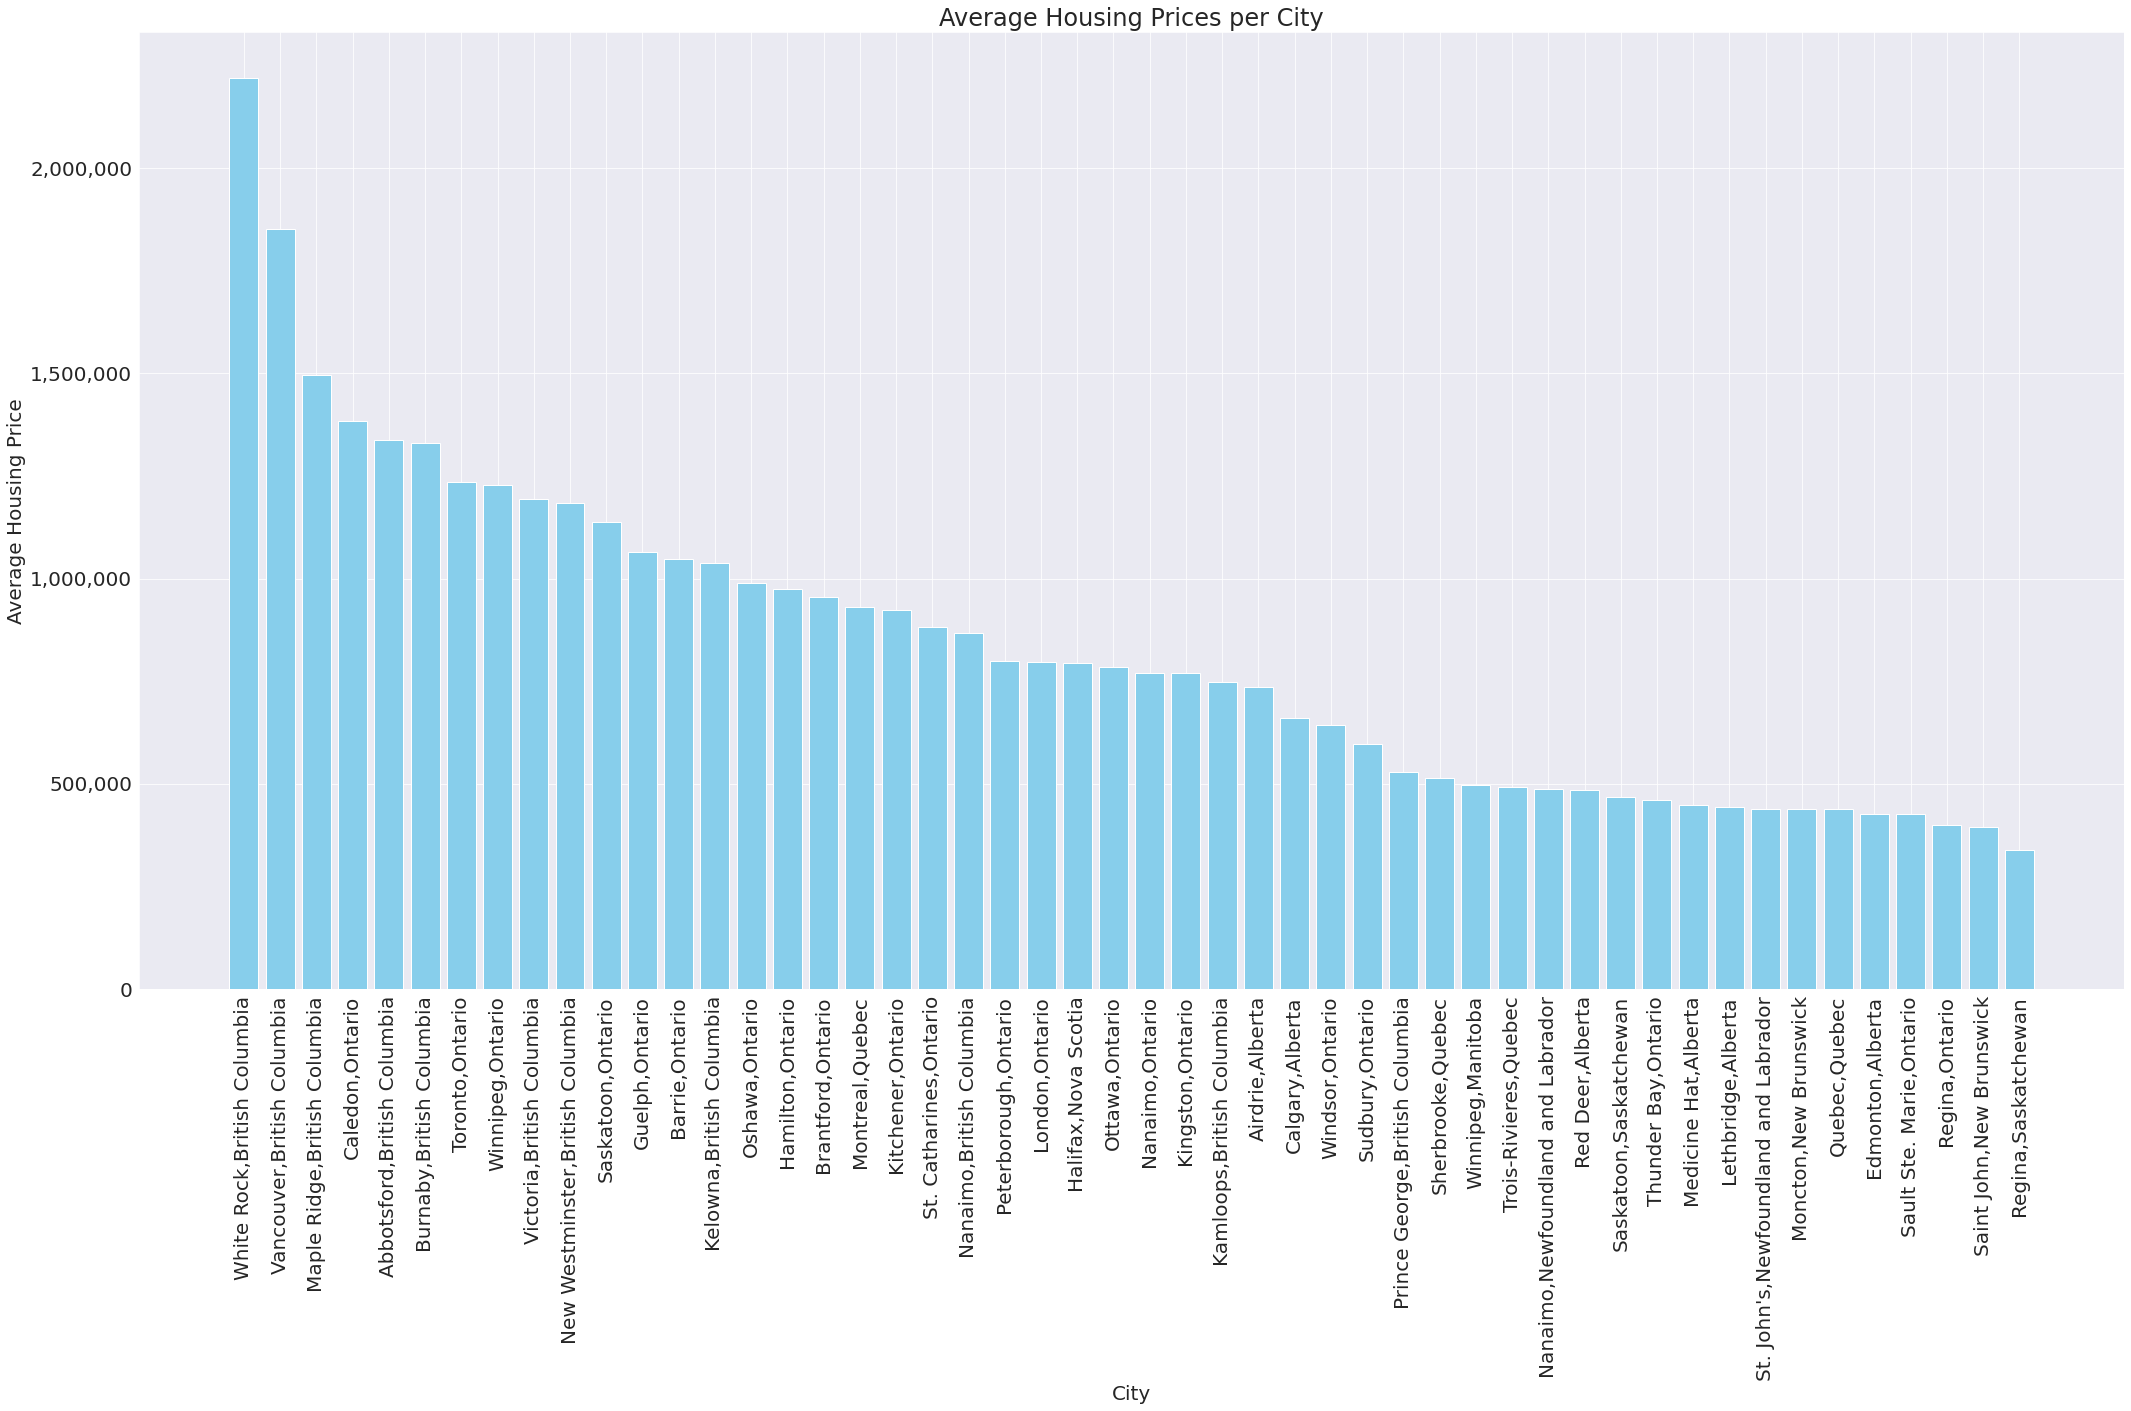

In [37]:
sorted_data = average_price_per_city.sort_values('Price', ascending=False)
plt.figure(figsize=(30, 20))
plt.bar(sorted_data['City'] + ',' + sorted_data['Province'], sorted_data['Price'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Housing Price')
plt.title('Average Housing Prices per City')
formatter = ticker.StrMethodFormatter('{x:,.0f}')  
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It is evident that White Rock, BC averages the highest in terms of housing costs while Regina, Saskatchewan averages at the least.

We would also like to group the average price by province

In [39]:
average_price_per_province = raw_data.groupby('Province')['Price'].mean().reset_index()

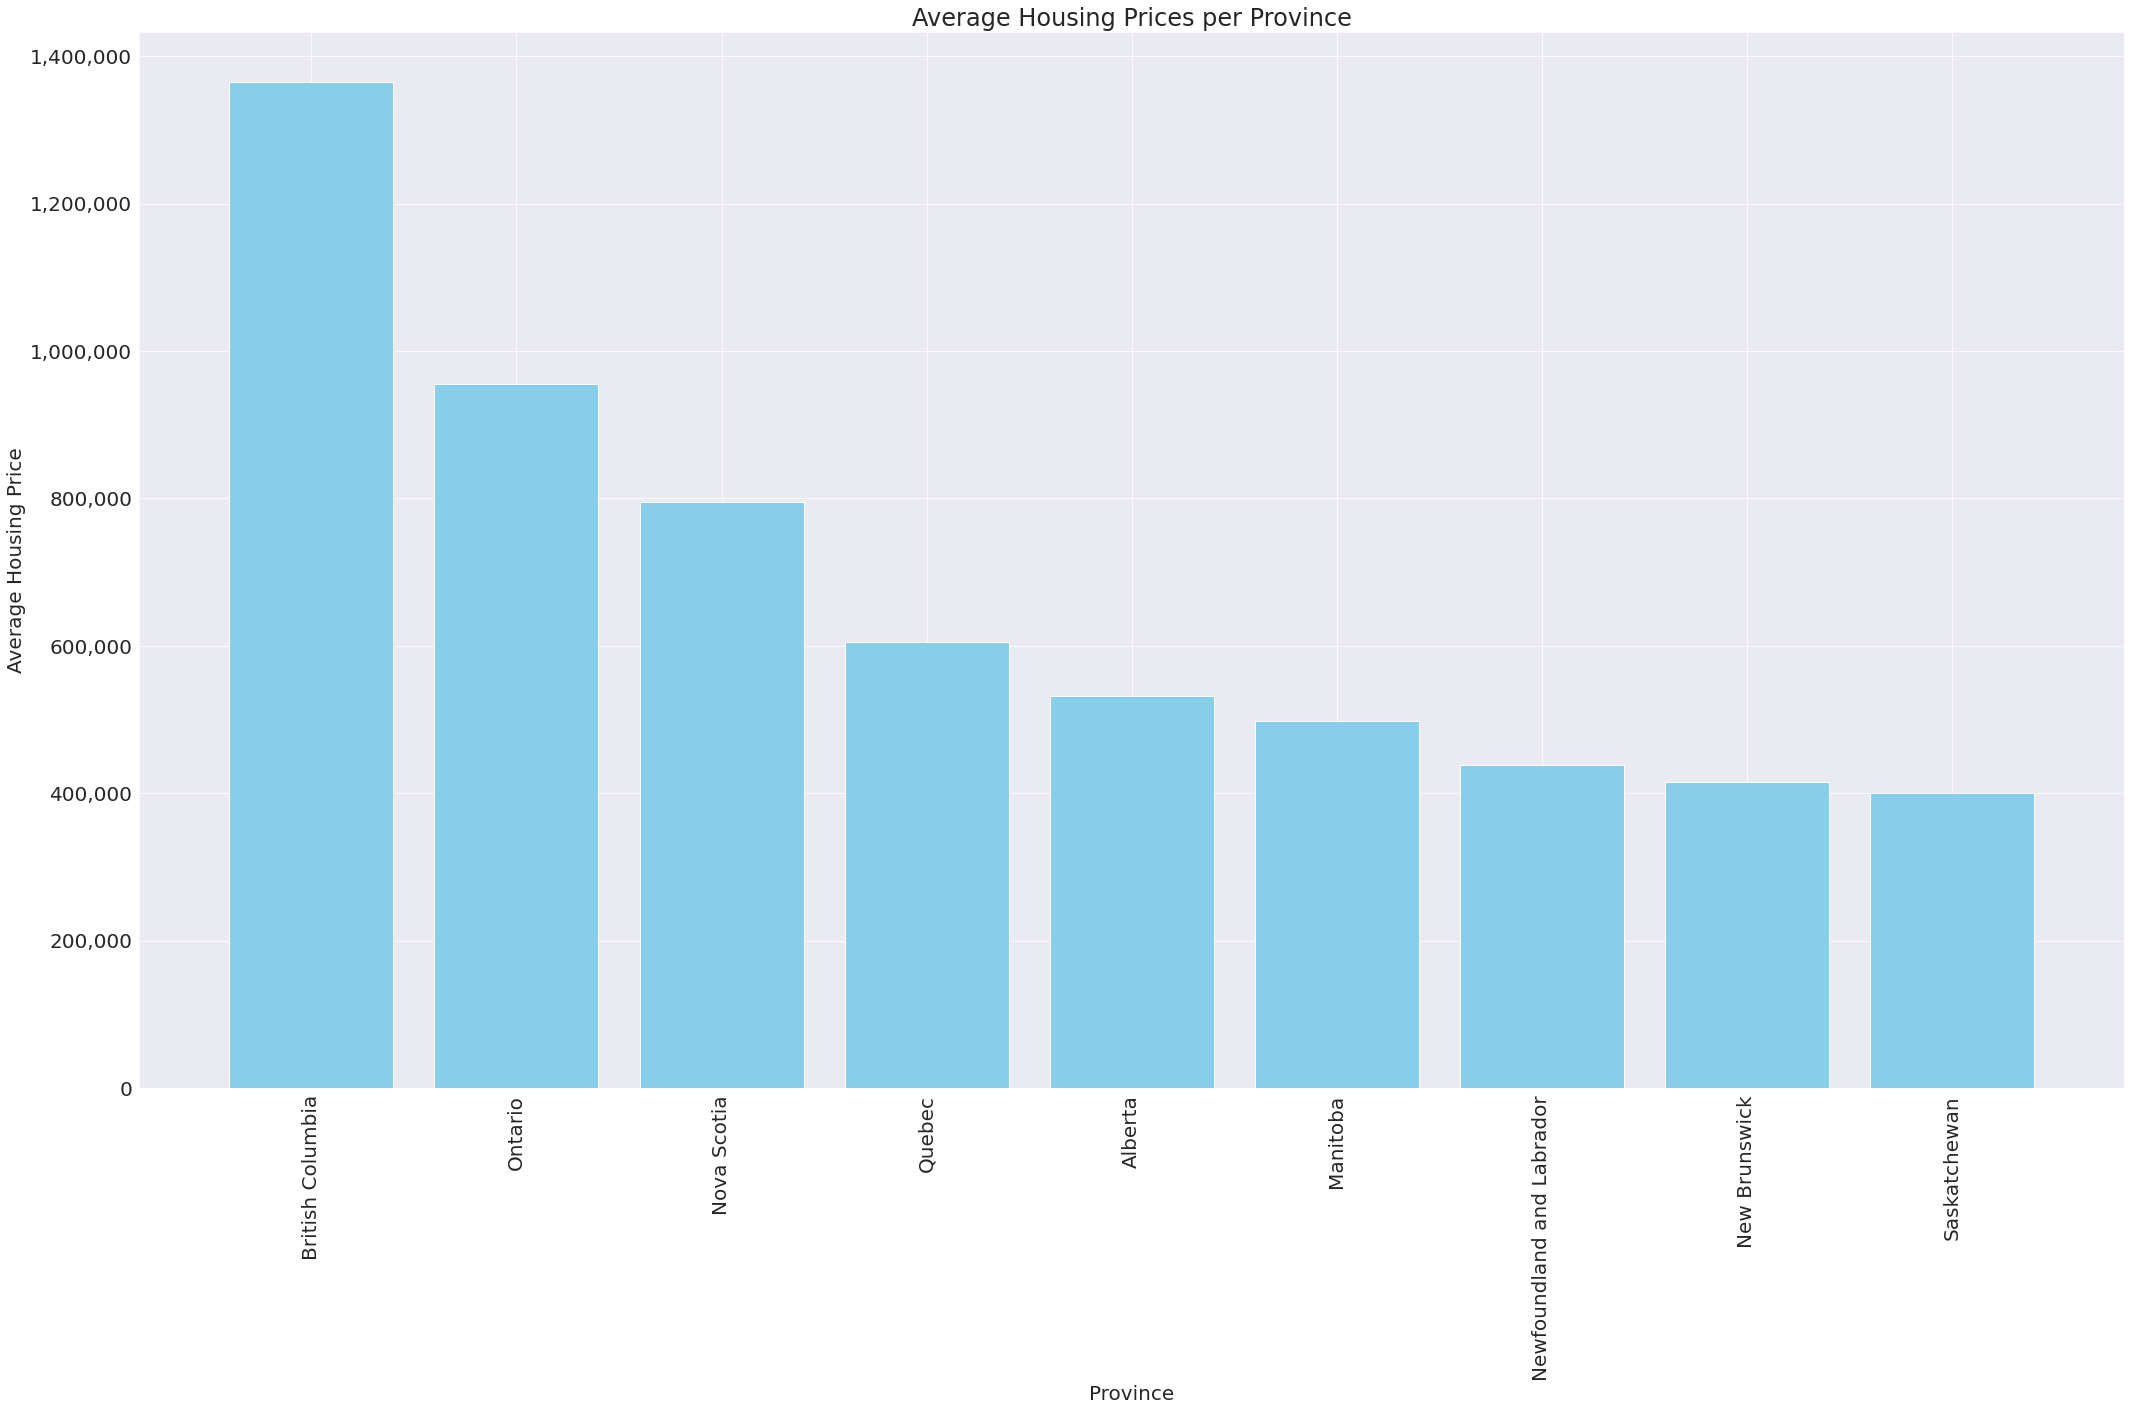

In [40]:
sorted_data = average_price_per_province.sort_values('Price', ascending=False)
plt.figure(figsize=(30, 20))
plt.bar(sorted_data['Province'], sorted_data['Price'], color='skyblue')
plt.xlabel('Province')
plt.ylabel('Average Housing Price')
plt.title('Average Housing Prices per Province')
formatter = ticker.StrMethodFormatter('{x:,.0f}')  # Adjust format as needed, here displaying as integers with commas
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Would like to explore the population by city 

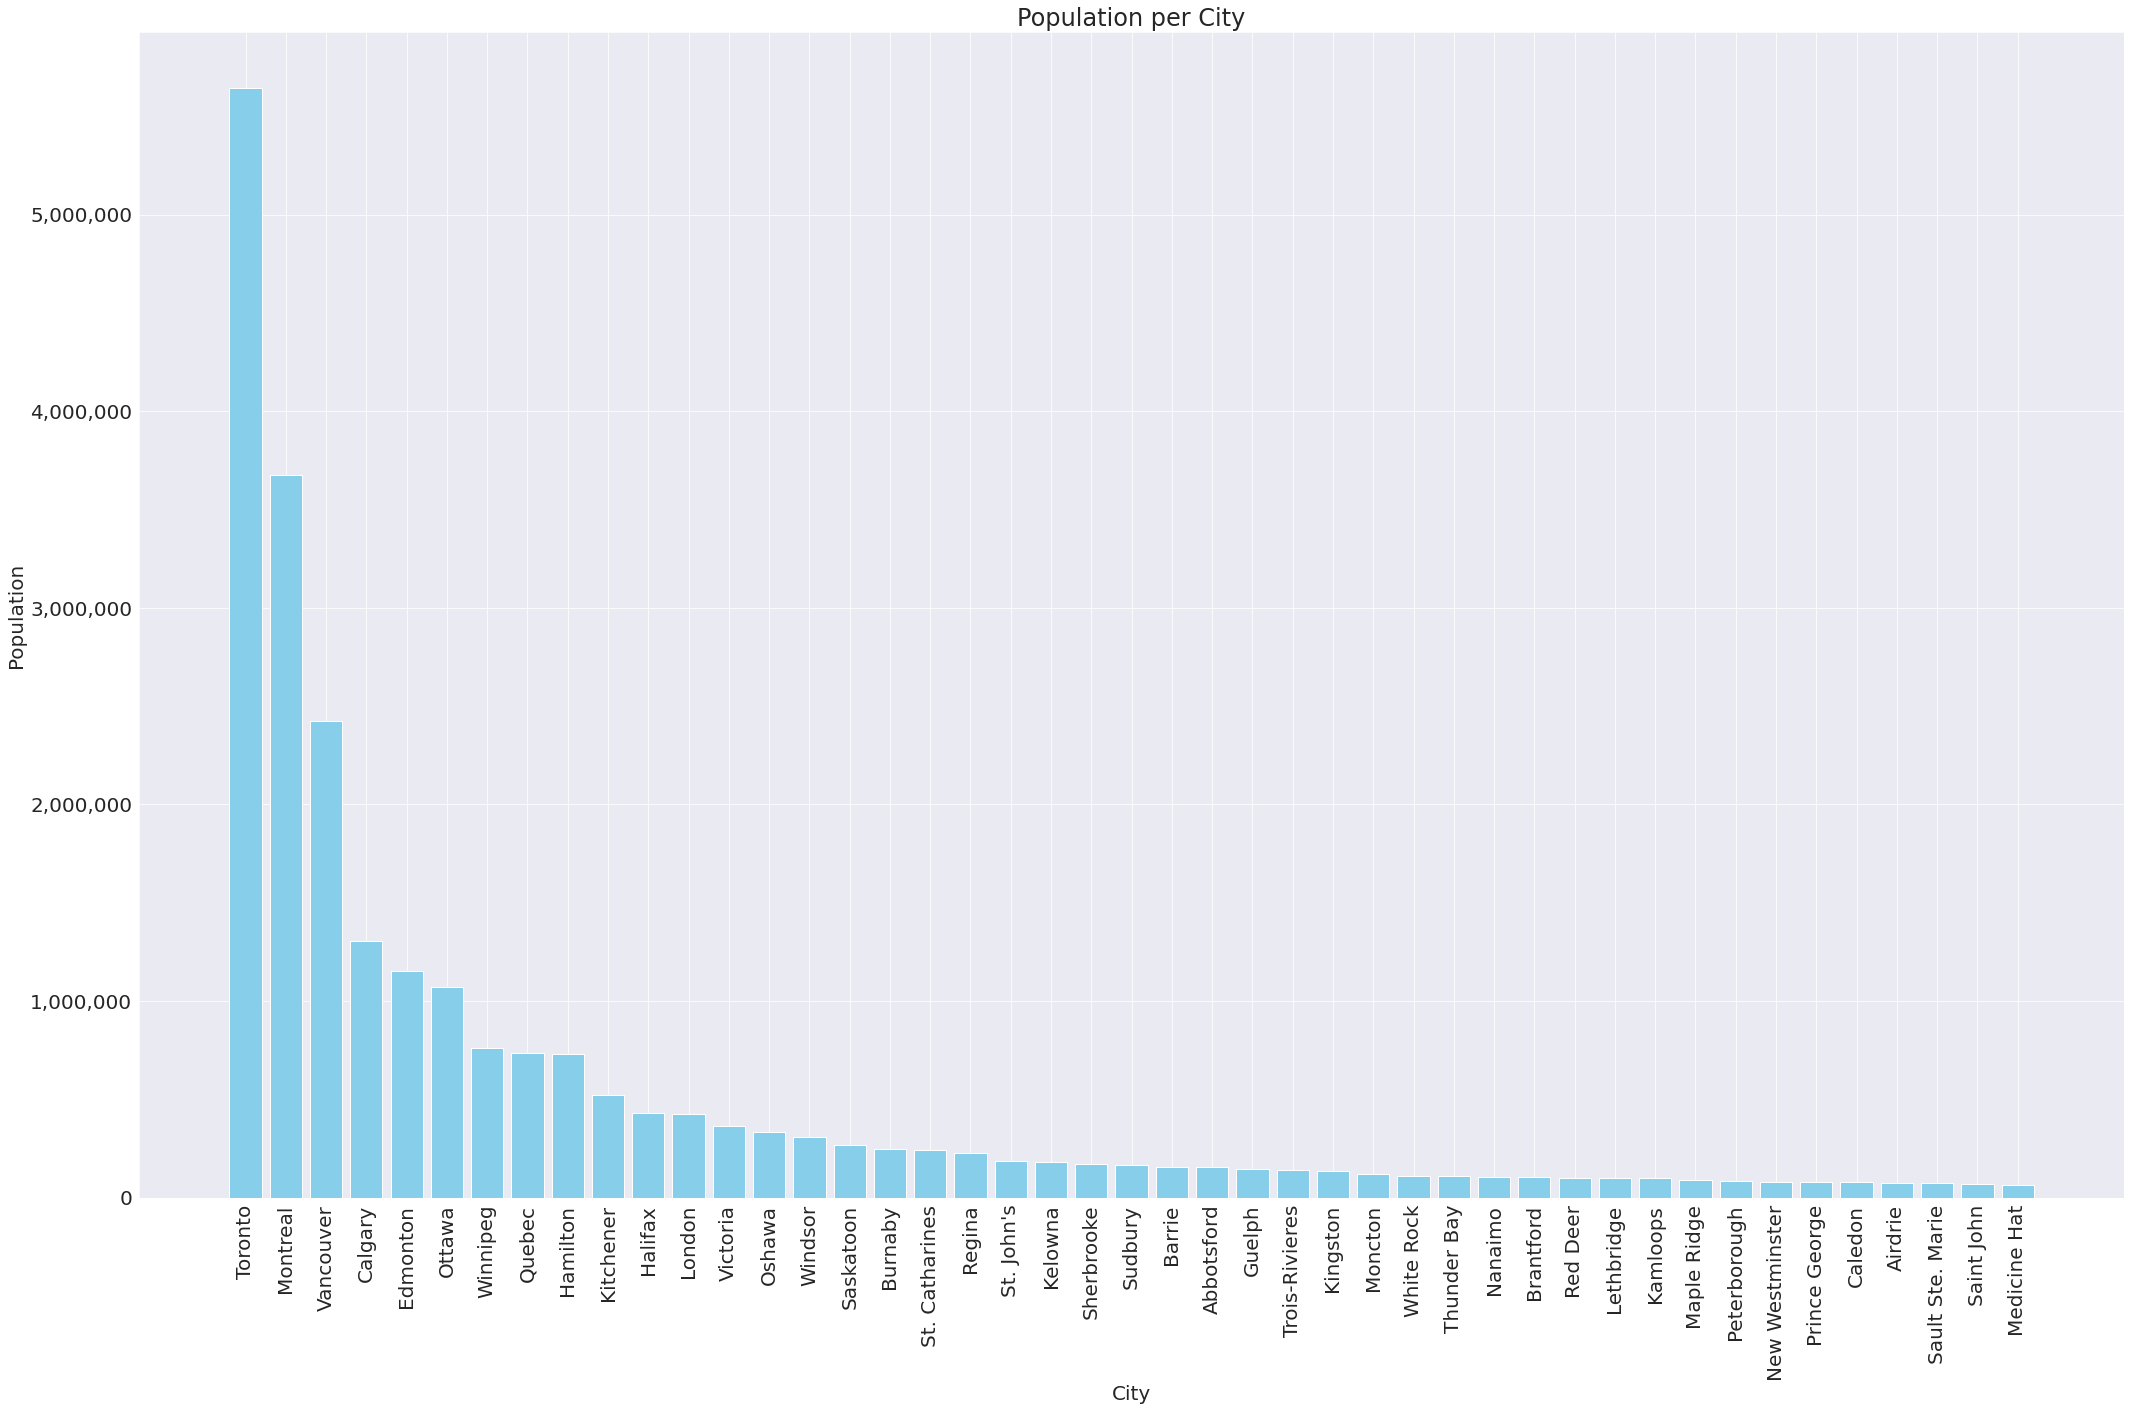

In [41]:
sorted_data = raw_data.sort_values('Population', ascending=False)
plt.figure(figsize=(30, 20))
plt.bar(sorted_data['City'], sorted_data['Population'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Population')
plt.title('Population per City')
formatter = ticker.StrMethodFormatter('{x:,.0f}')  # Adjust format as needed, here displaying as integers with commas
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can also explore the median household income by city

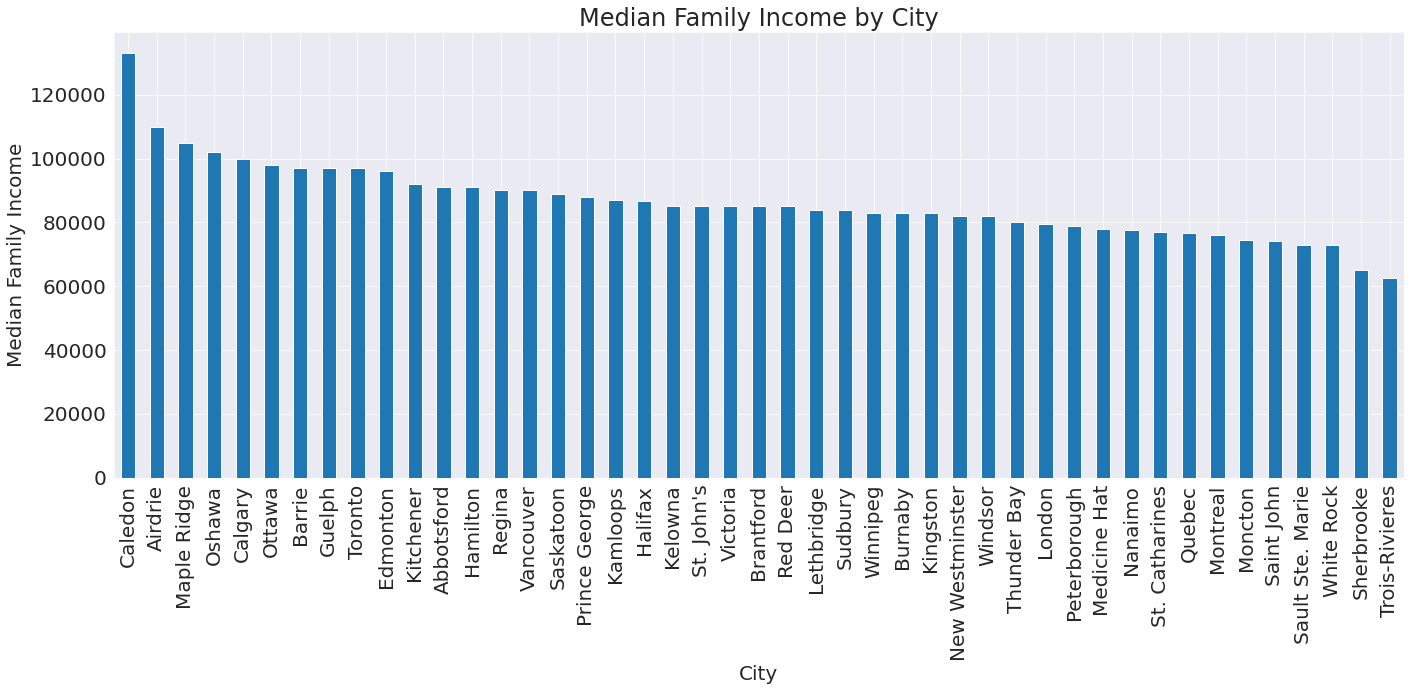

In [67]:
import matplotlib.pyplot as plt

# Assuming 'raw_data' is your DataFrame
# Grouping the data by 'City' and calculating median income
median_income_by_city = raw_data.groupby('City')['Median_Family_Income'].median().sort_values(ascending=False)

# Plotting the median family income by city
plt.figure(figsize=(20, 10))
median_income_by_city.plot(kind='bar')
plt.title('Median Family Income by City')
plt.xlabel('City')
plt.ylabel('Median Family Income')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


In [42]:
average_price_per_beds = raw_data.groupby('Number_Beds')['Price'].mean().reset_index()

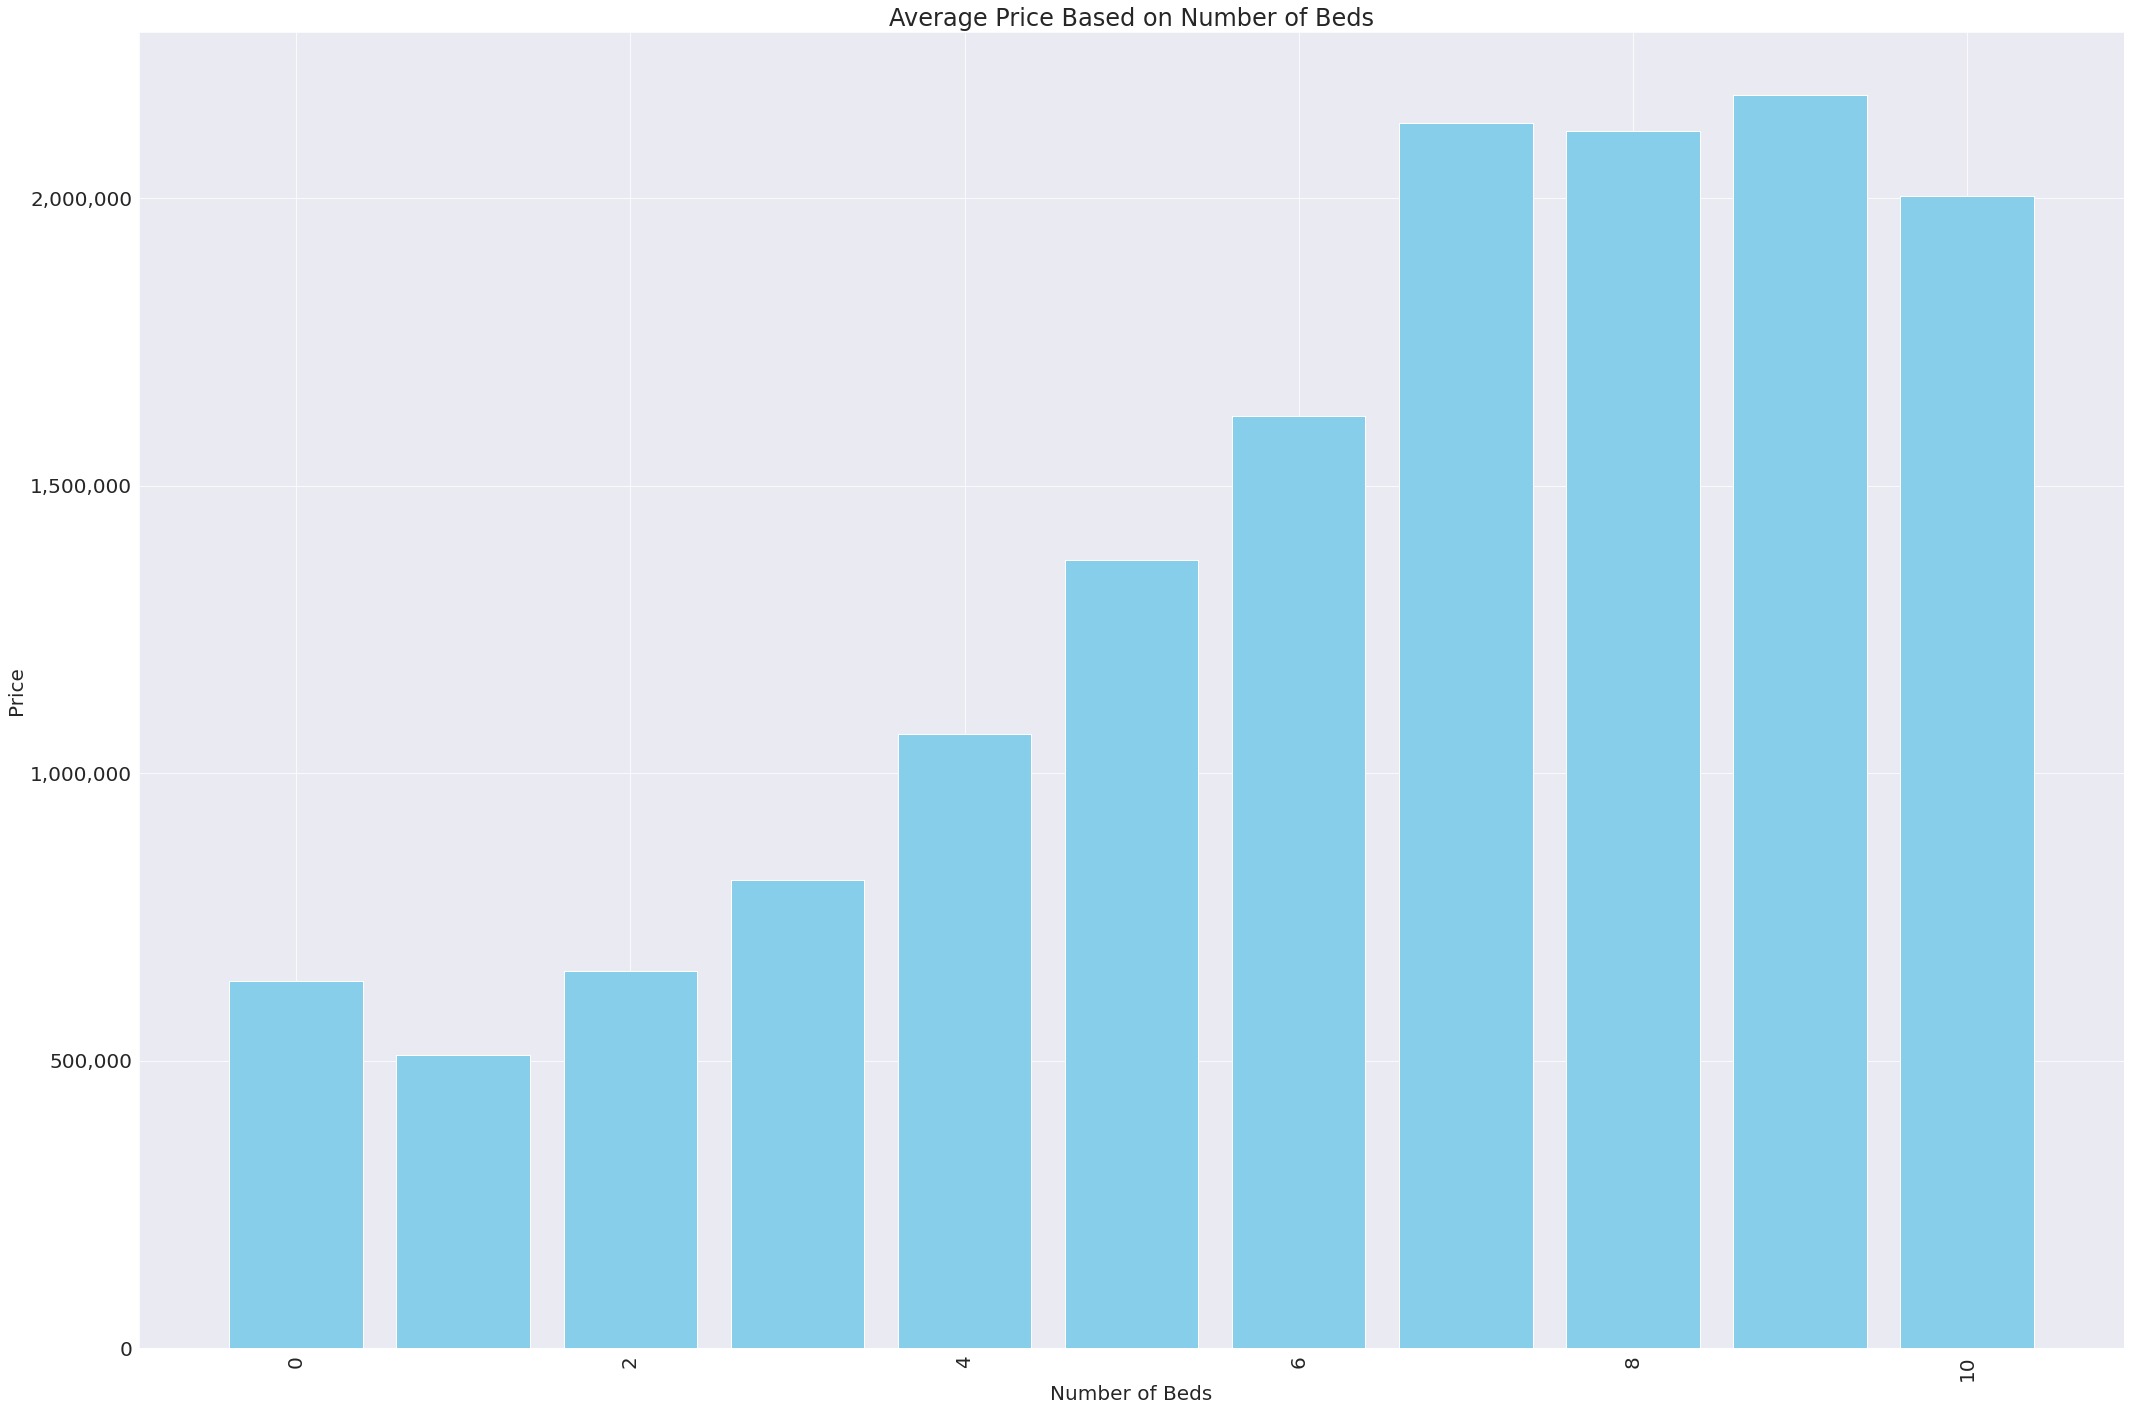

In [43]:
sorted_data = average_price_per_beds.sort_values('Price', ascending=False)
min_beds=0
max_beds=10
filtered_data = sorted_data[(sorted_data['Number_Beds'] >= min_beds) & (sorted_data['Number_Beds'] <= max_beds)]

plt.figure(figsize=(30, 20))
plt.bar(filtered_data['Number_Beds'], filtered_data['Price'], color='skyblue')
plt.xlabel('Number of Beds')
plt.ylabel('Price')
plt.title('Average Price Based on Number of Beds')
formatter = ticker.StrMethodFormatter('{x:,.0f}')    
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There is an overall increase in pricing as number of beds increase, with the exception between 0 and 1 beds, and 9 and 10 beds.

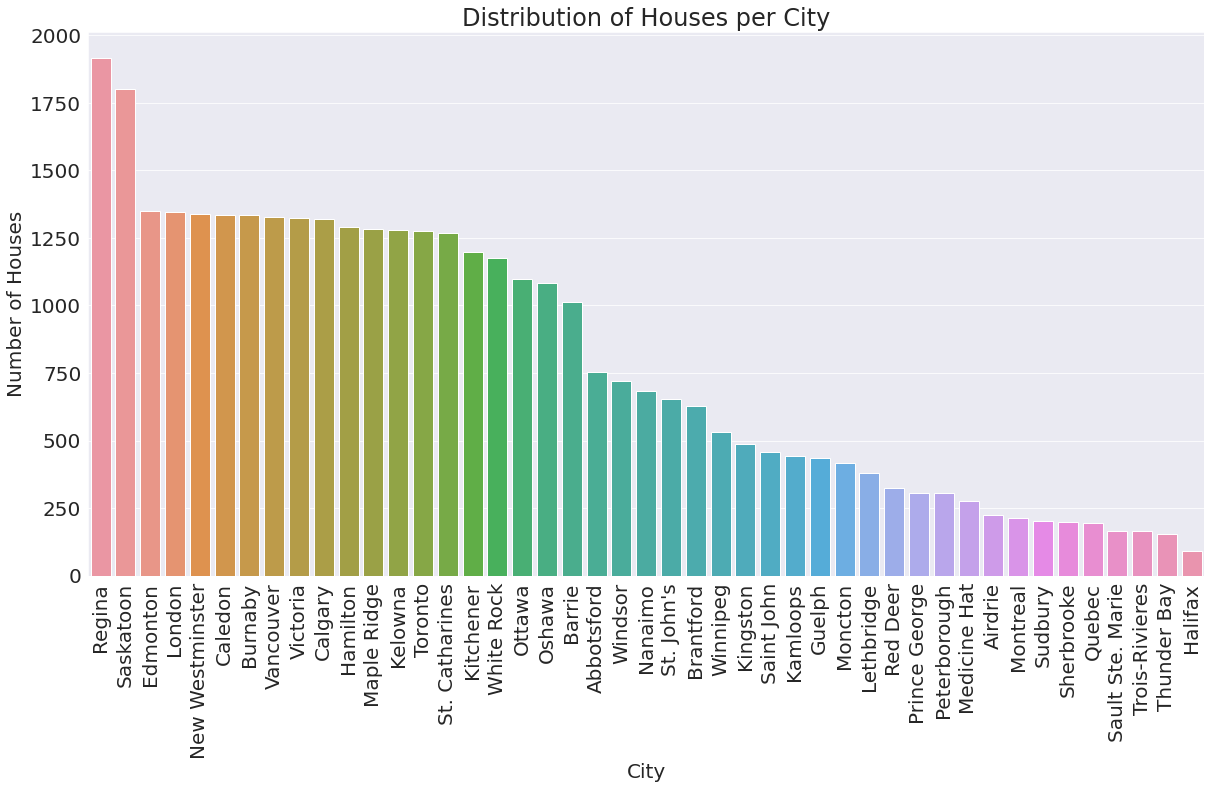

In [44]:

plt.figure(figsize=(20, 10))
sns.countplot(x='City', data=raw_data, order=raw_data['City'].value_counts().index)
plt.title('Distribution of Houses per City')
plt.xlabel('City')
plt.ylabel('Number of Houses')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability
plt.show()

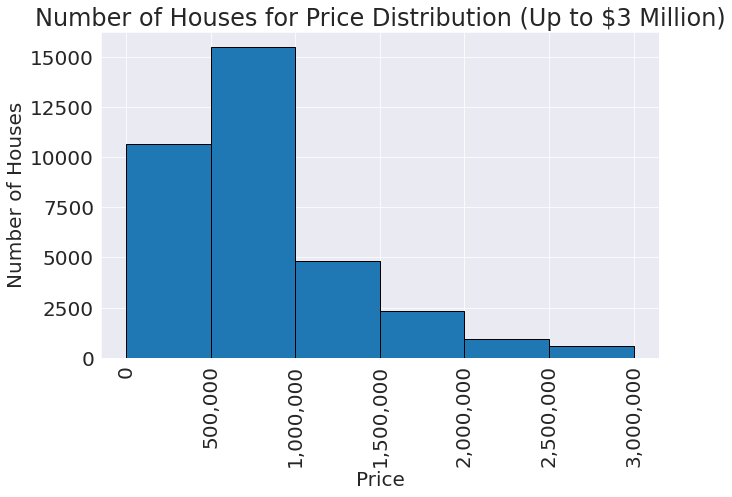

In [52]:

plt.figure(figsize=(10, 6))

# Define the range and increments for the histogram
bin_width = 500000
bin_range = range(0, 3000001, bin_width)

# Plotting the price distribution within the specified range and increments
plt.hist(raw_data['Price'], bins=bin_range, edgecolor='black')
formatter = ticker.StrMethodFormatter('{x:,.0f}')    
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=90) 
plt.title('Number of Houses for Price Distribution (Up to $3 Million)')
plt.xlabel('Price')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()


We note that the majority of houses are priced between 500,000 and 1 million.

## Questions 


#### What is the most expensive house, and which city is it located in? What about the least? What can we say about the corresponding information? 

In [58]:

most_expensive_house = raw_data.loc[raw_data['Price'].idxmax()]

price ="{:,}".format(most_expensive_house['Price'])
address = most_expensive_house['Address']
city = most_expensive_house['City']
province = most_expensive_house['Province']
num_beds = most_expensive_house['Number_Beds']
num_baths = most_expensive_house['Number_Baths']

print(f"The most expensive house in this dataset is priced at ${price}.")
print(f"It is located at {address}, {city}, {province}.")
print(f"Number of Bedrooms: {num_beds}, Number of Bathrooms: {num_baths}")


The most expensive house in this dataset is priced at $37,000,000.0.
It is located at 1775 RIDGE RD W, Barrie, Ontario.
Number of Bedrooms: 8, Number of Bathrooms: 11


In [60]:
least_expensive_house = raw_data.loc[raw_data['Price'].idxmin()]

price="{:,}".format(least_expensive_house['Price'])
address = least_expensive_house['Address']
city = least_expensive_house['City']
province = least_expensive_house['Province']
num_beds = least_expensive_house['Number_Beds']
num_baths = least_expensive_house['Number_Baths']

print(f"The least expensive house in this dataset is priced at ${price}.")
print(f"It is located at {address}, {city}, {province}.")
print(f"Number of Bedrooms: {num_beds}, Number of Bathrooms: {num_baths}")

The least expensive house in this dataset is priced at $21,500.0.
It is located at 3065 Green Bank ROAD, Regina, Saskatchewan.
Number of Bedrooms: 3, Number of Bathrooms: 3


We can see that the most expensive house is located in Ontario which is the second most expensive province, and the least expensive house is in Saskatchewan which has the least expensive average housing prices. This result provides some insight into the general trend of houses being more expensive where the average housing prices in the province are expensive. However, if we view this by city, Barrie is not the most expensive average housing price city but it contains the most expensive house.

#### Does median family income affect housing prices by city?

Median family income does not necessarily have a direct relationship with average housing prices by city. Caledon has the highest median income, however, it does not directly correlate to being the city with the highest average housing price. Similarly with White Rock, it averages at the highest housing prices but not the highest median income. Therefore, we cannot conclude that median family income affects housing prices by city. 

#### What additional factors have an impact on average housing prices? Which ones do not?

Number of beds generally have a direct relationship with the average price. This is confirmed by the general consensus that the more bedrooms available would increase the value of a home "https://listwithclever.com/real-estate-blog/how-much-value-does-extra-bedroom-add-to-house/". Population does not necessarily impact average housing prices by city. White Rock had the most expensive average housing price, but has a considerably low population. Similarly, Toronto has the highest population but was not necessarily the city with the highest average housing price. There would be other factors to be investigated that contribute to average housing price by city. 

#### What other factors outside this set could affect housing prices?

Other factors that could affect housing prices include location and neighborhood. Some neighborhoods have a higher desirability than others due to proximity to amenities and safety. Housing demand can also impact the prices by city. If there are less houses available and more people looking to buy, this may drive prices up. If there is less demand, the pricing may also decrease. 

## Inferences and Conclusion

The analysis highlights intriguing insights into Canadian housing prices. The most expensive property, valued at 37,000,000, is situated in Barrie, Ontario, while the least expensive, priced at 21,500, is in Regina, Saskatchewan. Interestingly, this reveals that the most costly house isn't necessarily found in the city with the highest average housing prices. Examining median family income's impact on housing prices reveals no direct correlation across cities, as some high-income cities don't exhibit the highest average housing costs. While the number of bedrooms generally influences prices, population alone doesn't significantly impact average housing prices. Beyond this dataset, neighborhood desirability, demand-supply dynamics, and location-related attributes notably shape housing costs. Factors like location, infrastructure, economic conditions, and market trends are also key influencers, extending the spectrum of factors governing housing prices beyond this dataset's scope.